# Project Title: Integrating Traditional Health Data and Simulated Wearable Device Metrics for Stroke Prediction
## Author: Ebelechukwu Chidimma Igwagu

## Project Overview

Stroke has been identified as the second leading cause of death and the third leading cause of both death and disability worldwide ([Feigin, 2022](https://www.dropbox.com/scl/fi/tiqrhvs06s58yamxa053x/World-Stroke-Organization-WSO-Global-Stroke-Fact-Sheet-2022.pdf?rlkey=pbndaqvaadzpij099dwe6psx5&e=1&dl=0)). The center for disease control has identified risk factors for stroke to include previous stroke or transient ischemic attack, heart disease, high cholesterol, hypertension, diabetes, sickle cell disease, smoking, Genetics and family history, age, sex and race ([CDC](https://www.cdc.gov/stroke/risk-factors/index.html)).

This project presents my analysis of the Kaggle Stroke dataset, which includes data from 5,110 subjects and can be accessed [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download). The original dataset was enhanced by adding three additional variables derived from simulating wearable smart watches data by random data synthesis. This modification was essential to evaluate the influence of these variables on stroke prediction and to integrate concepts of random number generation covered in the Programming for Data Analytics module.

### Dataset Variables 

A. **Kaggle Stroke dataset variables**

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient (years)
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

B. **The synthetic wearable smart watches variables** 

1) Resting heart rate	
2) Sleep duration
3) Step count

### Problem Statement: 

1. Which features in the dataset exhibit a significant correlation with stroke?  
2. Can health data synthesis using random number generators effectively simulate disease states?  
3. Does integrating synthetic wearable device data into the original Kaggle stroke dataset enhance stroke prediction performance based on machine learning evaluation?

### Importing the necessary Libraries 

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
sns.set_theme() #set seaborn as default style for plots when using matplotlib

In [2]:
# Import the machine learning Model building libraries

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*tight_layout.*")

### Kaggle Stroke Dataset Basic Exploratory data Analysis

#### Loading Kaggle Stroke dataset

In [3]:
filepath = r'C:\Users\great\Desktop\ATU\Semester 2\PFDA\pfda_project\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filepath)

#### Basic Data Exploration

In [4]:
# Display the first 5 rows
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Display the last 5 row
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Summarize the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Data Cleaning - Dealing with missing values

The Body mass index(BMI)  column has 201 missing values and the distribution of these missing values weree visualized to help understand the best method to be used in handling it. This showed a uniform distribution across the differnet variables. The height and age of a patient has been reported as a known factor that affects the bmi patient ([Holt *et al*, 2023](https://pmc.ncbi.nlm.nih.gov/articles/PMC10649148/)). The oldest population in the dataset comprise the highest proportion of the BMI missing value. Imputation using the mean BMI by age was used to fill out the missing values.


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

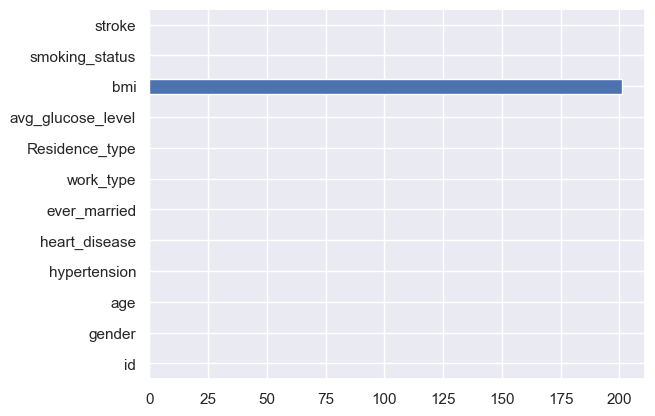

In [8]:
# Check for missing values
print(df.isnull().sum())

# Plot the null values
df.isna().sum().plot.barh()

In [9]:
# Create a new dataframe with only the missing values
null_data = df[df.isnull().any(axis=1)]
null_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1


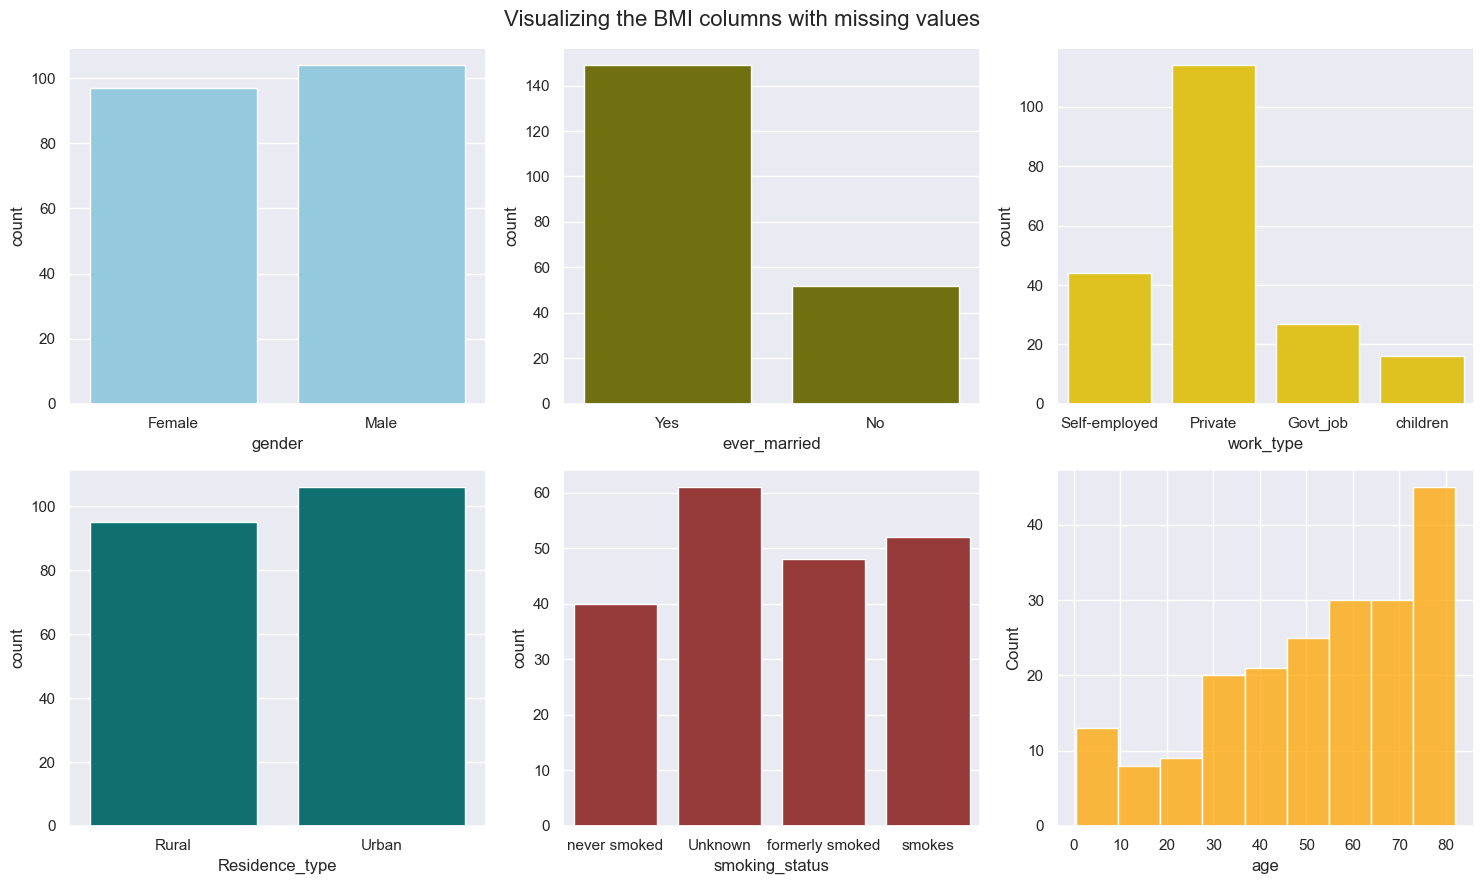

In [10]:
# Visualizing some variables in the BMI column with missing values to understand its distribution
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Visualizing the BMI columns with missing values', fontsize=16)

# Plot the countplot and histogram
sns.countplot(data=null_data, x="gender", color="skyblue", ax=axs[0, 0])
sns.countplot(data=null_data, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=null_data, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=null_data, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=null_data, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=null_data, x="age", color="orange", ax=axs[1, 2])

# Adjust Layout
plt.tight_layout()
plt.show()

In [11]:
# Check for the frequency of each distinct age in the dataset
df['age'].value_counts()


age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [12]:
# Calculate the mean BMI for each age to 1 decimal place
age_mean_bmi = df.groupby('age')['bmi'].mean().round(1)
print (age_mean_bmi)

age
0.08     15.5
0.16     14.8
0.24     17.4
0.32     18.1
0.40     15.8
         ... 
78.00    27.9
79.00    27.9
80.00    28.8
81.00    28.0
82.00    28.0
Name: bmi, Length: 104, dtype: float64


In [13]:
# Replace missing BMIs with age specific mean BMI 
df['bmi'] = df['bmi'].fillna(df['age'].map(age_mean_bmi))

# Recheck for missing BMI values
df['bmi'].isnull().sum()


0

### Wearable Smart Watches Data Synthesis

Resting heart rate, sleep duration, and step count are three key health metrics commonly monitored by smartwatches and are used as variables in the synthetic data. The data synthesis process involved researching medical publications to get population reference ranges for these variables. These reference ranges were used to calculate the mean and standard deviations all of which were utilized in defining the functions as to simulate data as close as possible to real health data. The numpy random module generation was used for this.


In [14]:
# Define function for calculating the mean and SD from a reference range

def calculate_mean_std(low_limit, high_limit):
    mean = (low_limit + high_limit) / 2
    std_dev = (mean - low_limit) / 2
    return mean, std_dev

In [15]:
# Call the funtion for a reference range  60 - 100 beats per minute for resting heart rate
low_limit = 60
high_limit =100

mean, std_dev = calculate_mean_std(low_limit, high_limit)

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

Mean: 80.0, Standard Deviation: 10.0


In [16]:
# Set the random seed for reproducibility
np.random.seed(150)

#### Resting Heart Rate 

**Reference ranges utilized for resting heart rate (RHR)**

The mean and SDs were calculated with slight modifications and were used as conditions in the functions for the random data synthesis in beats per minute.

1. Infants (1 month-1 year): 80-160 bpm

2. Childhood (1-12 years): 75 - 130 bpm

3. Others ≥ 13 years): 60-100 bpm

4. Where hypertension == 1: > 80 bpm

These were modified from the Omron data available [here](https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age)

In [17]:
# Simulating Resting Heart Rate (RHR) 

def simulate_RHR(df):
    if df['age'] <= 1:
        RHR = np.random.normal(120, 20)  # using mean and SD for 1 year and below
    elif df['age'] > 1 and df['age'] <= 12:
      RHR = np.random.normal(90, 20)  # using mean and SD for > 1 to 12 years
    else:
       RHR = np.random.normal(80, 10)   # using mean and SD for > 12 years
    
    # Adjust for hypertension
    if df['hypertension'] == 1:
       RHR += np.random.uniform(5, 15) # higher RHR for patients with hypertension

   # Set realistic limits for RHR
       RHR = max(60, min(RHR, 200))
    
    return round(RHR, 1) # Rounds to 1 decimal place


#### Sleep Duration

**Reference ranges used for Sleep duration in hours**

The mean and SDs were calculated with slight modifications and were used as conditions in the functions for the random data synthesis

1. 0 - 5 years = 10 - 17 hrs
2. 6 - 17 years = 8 - 11 hrs
3. ≥ 18 years = 7 - 9 hrs
4. Where stoke == 1 sleep duration < 7 hrs in the kaggle dataset

These ranges were modified from the National Sleep Duration(US) published [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/table/t1-nss-10-421/).

In [18]:
# Function to generate sleep duration based on age, stroke and BMI
def sleep_duration(df):
    if df['age'] <= 5:
        sleep_duration = np.random.normal(14, 2) # using mean and SD for 5 years and below
    elif df['age'] < 18:  # Covers ages from 6 to 17
        sleep_duration = np.random.normal(10, 1)  # using mean and SD for > 5 to 17 years 
    else:  # Age ≥ 18
        sleep_duration = np.random.normal(8, 1)  # using mean and SD for 18 years and above

    # generate sleep duration < 7 hours for stroke patient
    if df['stroke'] == 1:
        sleep_duration = np.random.normal(5, 1) 

    # Adjust for higher BMI
    if df['bmi'] > 30:  # Obesity class
        sleep = np.random.normal(6, 1)  
    
    # Set sleep limit for all conditions
    return round(max(3, min(sleep_duration, 18)), 1)



#### Step Count 

**BMI Classification**

These BMI classification ranges were used for defining the conditions in the functions for the step count random data synthesis

|  S/N |BMI Category     |      BMI Range (kg/m2)  |
|------|-----------------|-------------------------|
|1. | Underweight     |       Less than 18.5    |
|2. | Healthy Weight  |        18.5 to less than 25 |
|3. | Overweight      |        25 to less than 30   |
|4. | Obesity         |        30 or greater        |
|5. | Class 1 Obesity |       30 to less than 35    |
|6. | Class 2 Obesity |        35 to less than 40   |
|7. | Class 3 Obesity(Severe Obesity)| 40 or greater |

This classification can be accessed [here](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html)

In [19]:
# Function to generate average daily step count based on BMI, stroke and hypertension

def generate_step_count(df):
    # Step Count Baseline (Realistic Estimates)
    if df['age'] < 18:
        base_steps = np.random.normal(12000, 2000)  # children & teens
    elif df['age'] < 40:
        base_steps = np.random.normal(10000, 1500)  # Young adults
    elif df['age'] < 60:
        base_steps = np.random.normal(8000, 1200)   # Middle-aged adults
    else:
        base_steps = np.random.normal(6000, 1000)   # Older adults

    # Adjust for BMI (Proportional Reduction)
    if df['bmi'] >= 35:  # Severe Obesity
        base_steps *= np.random.uniform(0.5, 0.7)  # Reduce 30-50%
    elif df['bmi'] >= 30:  # Obese
        base_steps *= np.random.uniform(0.7, 0.85)  # Reduce 15-30%
    elif df['bmi'] >= 25:  # Overweight
        base_steps *= np.random.uniform(0.85, 0.95)  # Reduce 5-15%

    # Adjust for Hypertension (Slight Reduction)
    if df['hypertension'] == 1:
        base_steps *= np.random.uniform(0.75, 0.9)  # Reduce 10-25%

    # Adjust for Stroke (Significant Reduction)
    if df['stroke'] == 1:
        base_steps *= np.random.uniform(0.3, 0.5)  # Reduce 40-60%

    # Ensure realistic step count bounds (500 - 14,000)
    return round(np.clip(base_steps, 500, 14000))


In [20]:
# Apply the functions to the Dataframe

df['resting_heart_rate'] = df.apply(simulate_RHR, axis=1)
df['sleep_duration'] = df.apply(sleep_duration, axis=1)
df['step_count'] = df.apply(generate_step_count, axis=1)


In [21]:
# Save the new dataset
df.to_csv('healthcare_wearable_data.csv', index=False)

### Merged Dataset Analysis

This section contains the deatiled exploratory data and machine learning analysis of the merged kaggle stroke dataset and synthetic wearable smart watches dataset. This was saved to a new CSV dataframe  named healthcare_wearable_data.csv and a copy to the database named stroke_wearable_data.db. The data was read in using both pandas and CSV to the variables merged_data and merged_data_db respectively. However, the rest of the analysis was performed using the pandas_CSV dataframe "merged_data".

#### Loading the merged dataset

In [22]:
data_path = r'C:\Users\great\Desktop\ATU\Semester 2\PFDA\pfda_project\healthcare_wearable_data.csv'
merged_data = pd.read_csv(data_path)

#### Saving the merged data to a database

In [23]:
# Connect to SQLite database
conn = sqlite3.connect('stroke_wearable_data.db')

# Save the DataFrame to the database (replace if table exists)
df.to_sql('merged_data', conn, if_exists='replace', index=False)

# Close connection
conn.close()

#### Loading the data from the database

In [24]:
# Reconnect to the database
conn = sqlite3.connect('stroke_wearable_data.db')

# Read the merged dataset
merged_data_db = pd.read_sql('SELECT * FROM merged_data', conn)

# Close connection
conn.close()

# Display the first 5 rows
print(merged_data_db.head(5))  

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  30.2     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  resting_heart_rate  sleep_duration  step_count  
0       1                77.7             3.4         903  
1       

### Data Exploration

In [25]:
# Display the first 5 rows
merged_data.head(5) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,77.7,3.4,903
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.2,never smoked,1,83.9,4.8,2403
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,83.6,4.6,1603
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,85.7,3.9,2206
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,96.2,5.8,2211


In [26]:
# Display the last 5 rows
merged_data.tail(5) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.8,never smoked,0,80.5,7.9,3047
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,101.9,8.2,3122
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,78.5,7.1,6938
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,88.7,9.1,7143
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,72.5,8.1,5116


In [27]:
#Display information about the dataset
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   gender              5110 non-null   object 
 2   age                 5110 non-null   float64
 3   hypertension        5110 non-null   int64  
 4   heart_disease       5110 non-null   int64  
 5   ever_married        5110 non-null   object 
 6   work_type           5110 non-null   object 
 7   Residence_type      5110 non-null   object 
 8   avg_glucose_level   5110 non-null   float64
 9   bmi                 5110 non-null   float64
 10  smoking_status      5110 non-null   object 
 11  stroke              5110 non-null   int64  
 12  resting_heart_rate  5110 non-null   float64
 13  sleep_duration      5110 non-null   float64
 14  step_count          5110 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 599.0+

In [28]:
# Summary statistics
merged_data.describe() 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,resting_heart_rate,sleep_duration,step_count
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.918258,0.048728,82.488219,8.420528,7163.724658
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.729710,0.215320,13.049009,2.035520,3008.584213
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,36.700000,3.000000,657.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000,74.400000,7.300000,4923.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000,81.500000,8.200000,6701.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,89.100000,9.100000,9244.500000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,161.300000,18.000000,14000.000000


### Data Cleaning - Checking for MIssing Values

The merged data has no missing values.

In [29]:
# Dropping the id column as it is not relevant
merged_data.drop('id', inplace=True, axis=1)

In [30]:
merged_data.isnull().sum()  # Check for missing values

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
resting_heart_rate    0
sleep_duration        0
step_count            0
dtype: int64

### Data Visualization

The univariate, bivariate and multivariate analysis comparing the relevant variables to the target variable "Stroke" was used in data visualization to derive useful insights. The merged dataset has a total of eight categorical and six numerical variables.  This approach was used in a similar analysis that can be accessed [here](https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/).

1. **Categorical Variables**: gender, hypertension, heart disease, work type, ever married , Residence_type, smoking status, stroke.
2. **Numerical Variables**: age, average glucose level,  bmi,  resting heart rate, sleep duration, step count.

In [31]:
# group variables into categorical and numerical set
cat_var = merged_data[['gender', 'hypertension', 'heart_disease', 'work_type','ever_married', 'Residence_type', 'smoking_status', 'stroke']]
num_var = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']]

#### Univariate Analysis of Categorical Variables by Stroke status Plot Insights
A countplots of the categorical variables distribution with and without the stroke variable was plotted. It can be deduced from the countplots below that there is a slight imbalance in the gender, ever married and work type of the subjects in the dataset. The female gender, married subjects and those working in the private sector made up a huge proportion of the total population. A higher incidence of stroke was noted among the married subjects, former smokers, self employed status and those working in the private sector. The subject's gender and residence type showed no such elationship with the stroke status. Only a small proportion of the population has stroke, hypertension and heart disease making it difficult to deduce the impact from the plots.

In [32]:
# Define custom hex color palette
custom_palette = ['#4ECDC4', '#FF6B6B']  # Red & Teal

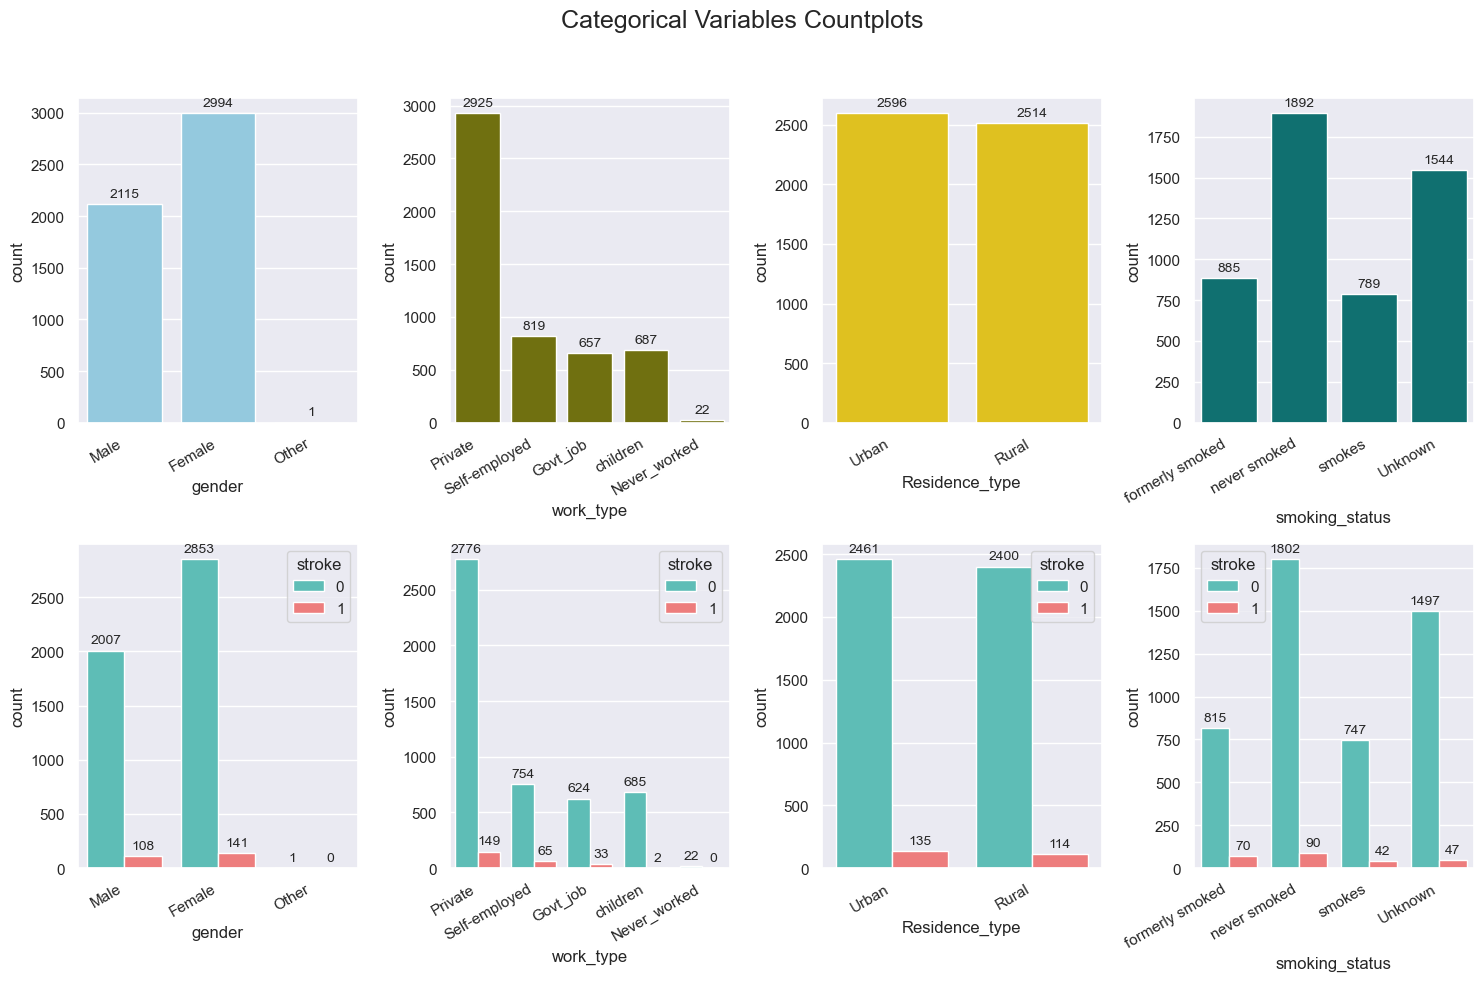

In [33]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='Residence_type', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='smoking_status', color='teal', ax=axs[0, 3])


# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=merged_data, x='Residence_type', hue='stroke', palette=custom_palette, ax=axs[1, 2])
sns.countplot(data=merged_data, x='smoking_status', hue='stroke', palette=custom_palette, ax=axs[1, 3])

# Add value counts on top of bars
for ax in axs.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)  # Add labels to each bar

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


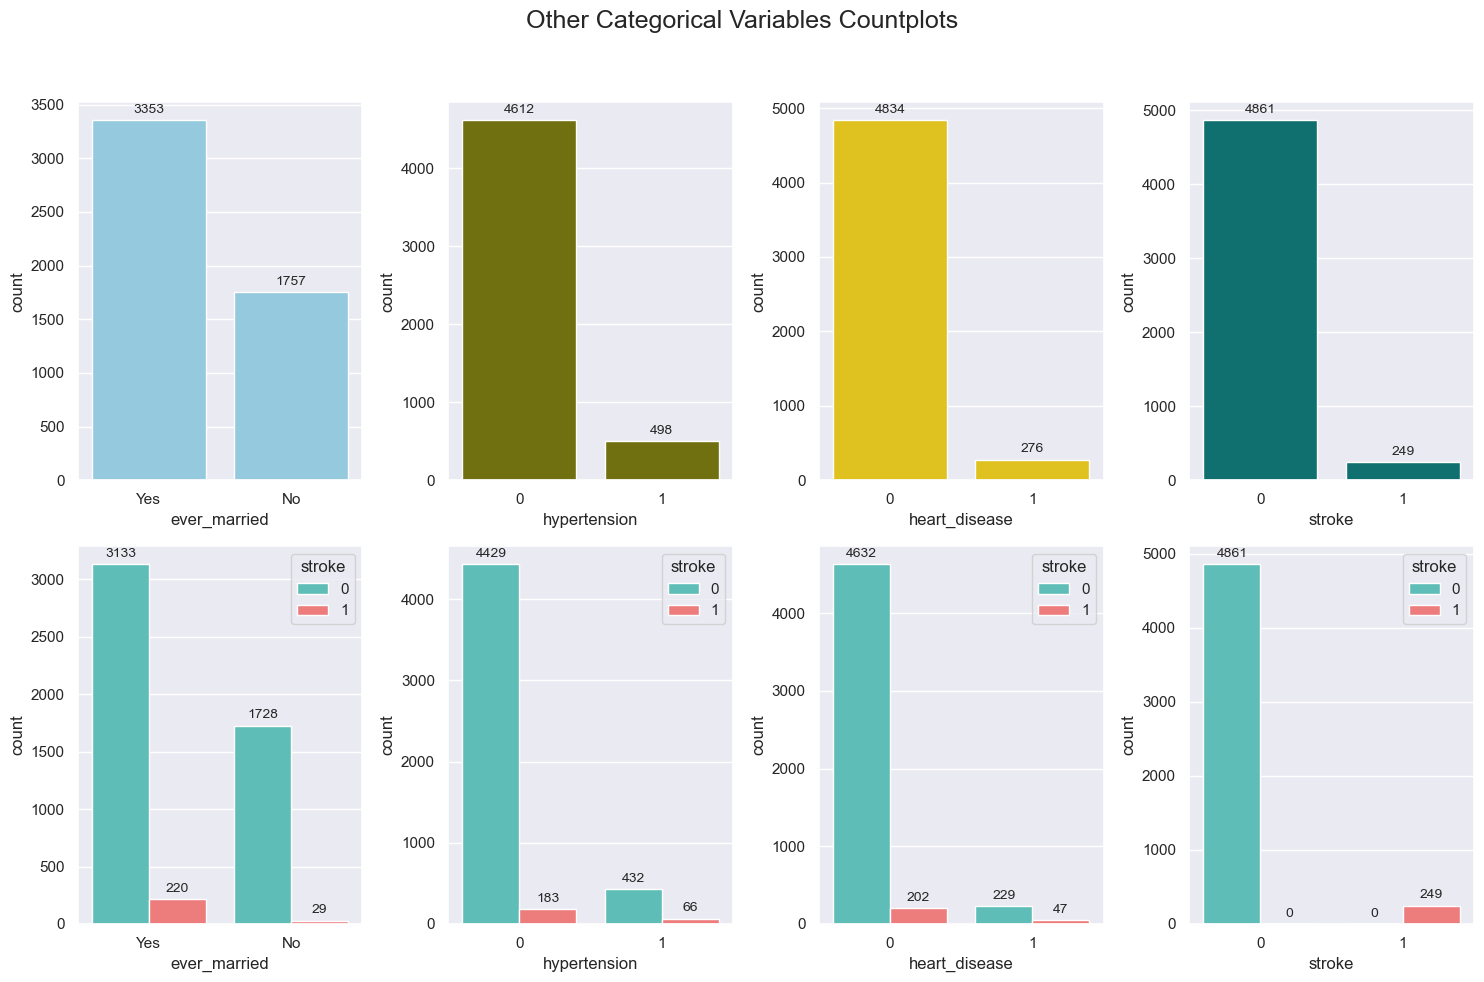

In [34]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Other Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='ever_married', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='hypertension', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='heart_disease', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='stroke', color='teal', ax=axs[0, 3])


# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='ever_married', hue='stroke', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=merged_data, x='hypertension', hue='stroke', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=merged_data, x='heart_disease', hue='stroke', palette=custom_palette, ax=axs[1, 2])
sns.countplot(data=merged_data, x='stroke', hue='stroke', palette=custom_palette, ax=axs[1, 3])

# Add value counts on top of bars
for ax in axs.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)  

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


#### Univariate and Bivariate Analysis of Numerical Variables by Stroke status Plot Insights

Histplots and boxplots of the numerical variables distribution with and without the stroke variable were plotted. These ahowed a normal distribution of the population with a higher incidence of stroke observed in the elderly subjects above 60 years of age. The stroke population have the average glucose concentration ranging from normal to high with most of the stroke subjects having higher average  glucose concenetration. A significantly lower sleep duration and step counts were observed in the subjects with stroke compared to the rest of the population. No significant difference in BMI and resting heart rate was noted in those with or without stroke. The boxplots showed a few outliers in the age and step count variables while the bmi, average glucose level, resting heart rate and sleep duration have numerous outliers. To avoid useful data loss, the outliers were not excluded from the boxplots.


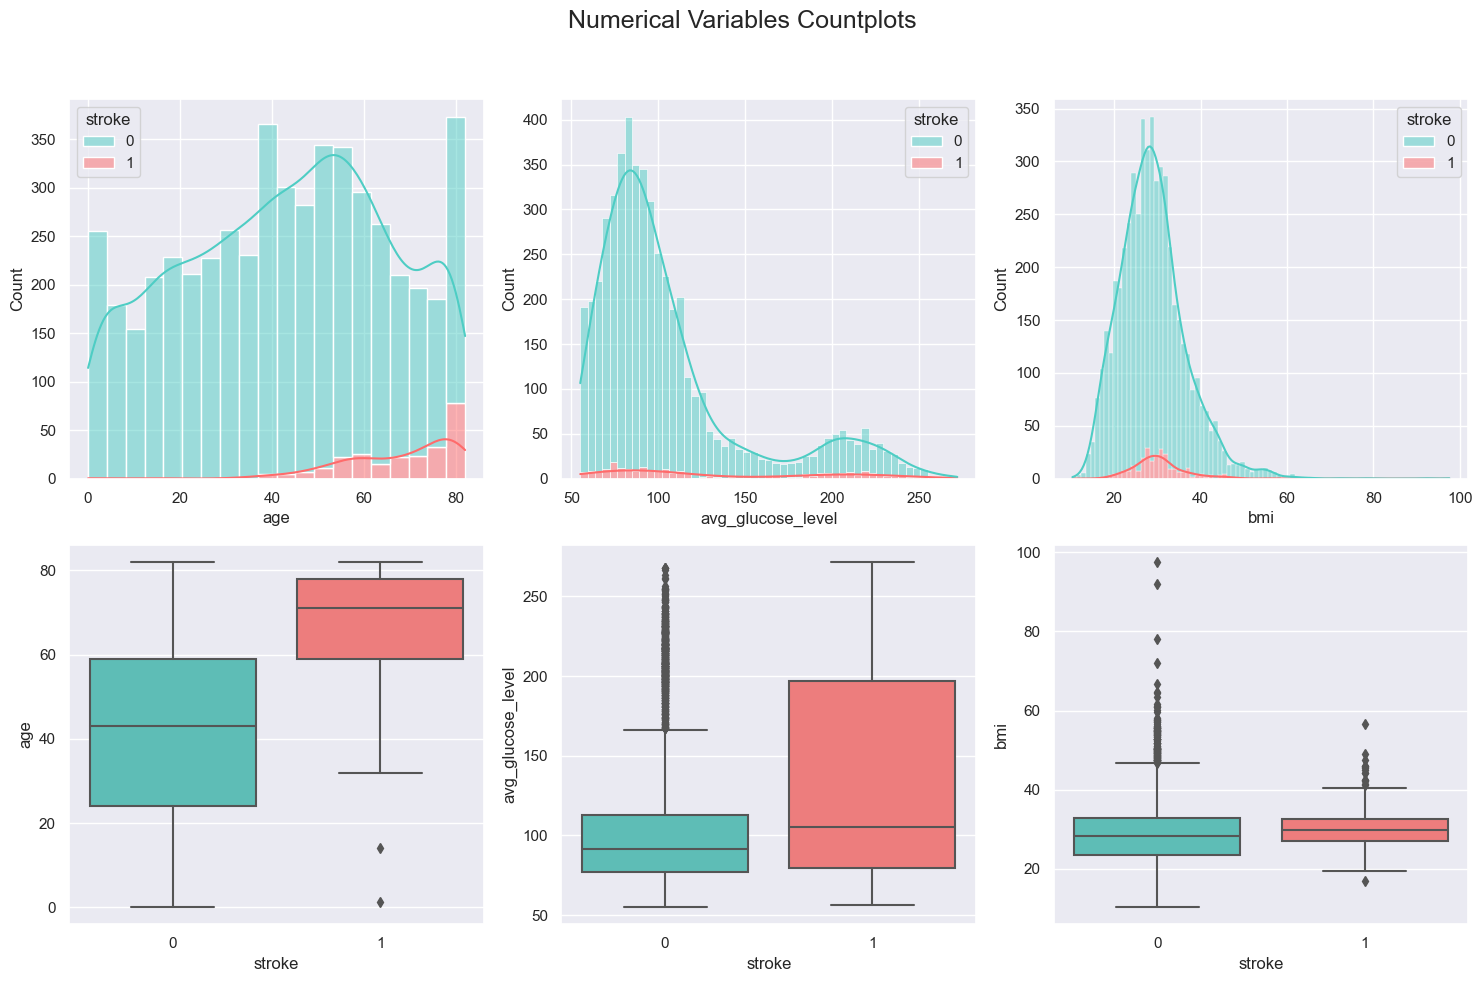

In [35]:
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Numerical Variables Countplots', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data, kde=True, x='age', hue='stroke', multiple='stack', ax=axs[0, 0], palette=custom_palette)
sns.histplot(data=merged_data, kde=True, x='avg_glucose_level', hue='stroke', multiple='stack', ax=axs[0, 1], palette=custom_palette)
sns.histplot(data=merged_data, kde=True, x='bmi', hue='stroke', multiple='stack', ax=axs[0, 2], palette=custom_palette)

# Second row: Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='age', ax=axs[1, 0], palette=custom_palette)
sns.boxplot(data=merged_data, x='stroke', y='avg_glucose_level', ax=axs[1, 1], palette=custom_palette)
sns.boxplot(data=merged_data, x='stroke', y='bmi', ax=axs[1, 2], palette=custom_palette)

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


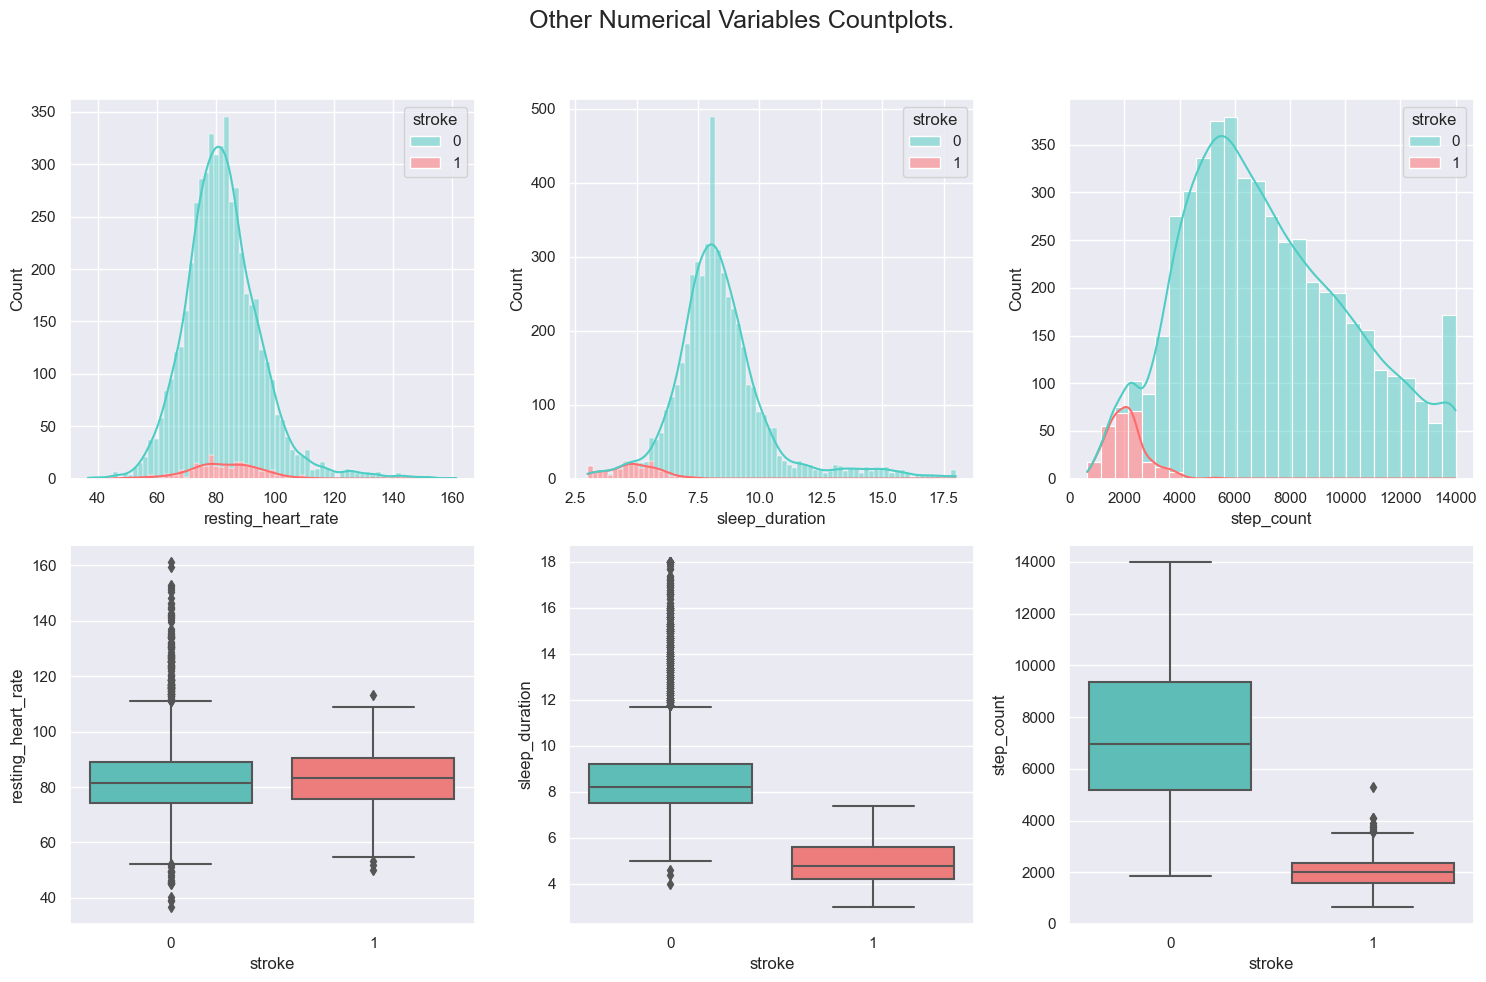

In [36]:
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Other Numerical Variables Countplots.', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data, kde=True, x='resting_heart_rate', hue='stroke', multiple='stack', ax=axs[0, 0], palette=custom_palette)
sns.histplot(data=merged_data, kde=True, x='sleep_duration', hue='stroke', multiple='stack', ax=axs[0, 1], palette=custom_palette)
sns.histplot(data=merged_data, kde=True, x='step_count', hue='stroke', multiple='stack', ax=axs[0, 2], palette=custom_palette)

# Second row: Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='resting_heart_rate', ax=axs[1, 0], palette=custom_palette)
sns.boxplot(data=merged_data, x='stroke', y='sleep_duration', ax=axs[1, 1], palette=custom_palette)
sns.boxplot(data=merged_data, x='stroke', y='step_count', ax=axs[1, 2], palette=custom_palette)

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


## Multivariate Analysis

The relationship between the continuous variables were explored using pairplot and correlation analysis. The pairplot and heatmap of the variables showing possible correlation with stroke from the univariate and bivariate analysis of the numeric variables were plotted.

The pairplot and heatmap revealed a strong negative correlation between age and step count (-0.8), BMI and step count (-0.6), as well as sleep duration and step count (-0.5), while the correlations with other variables were relatively weak. However, there is need to exclude other cofounding factors to ascertain the strength of these relationships.

### Pairplot for Exploring Relationships

In [37]:
plot_var = merged_data[['age', 'avg_glucose_level','sleep_duration', 'step_count', 'bmi', 'stroke']]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


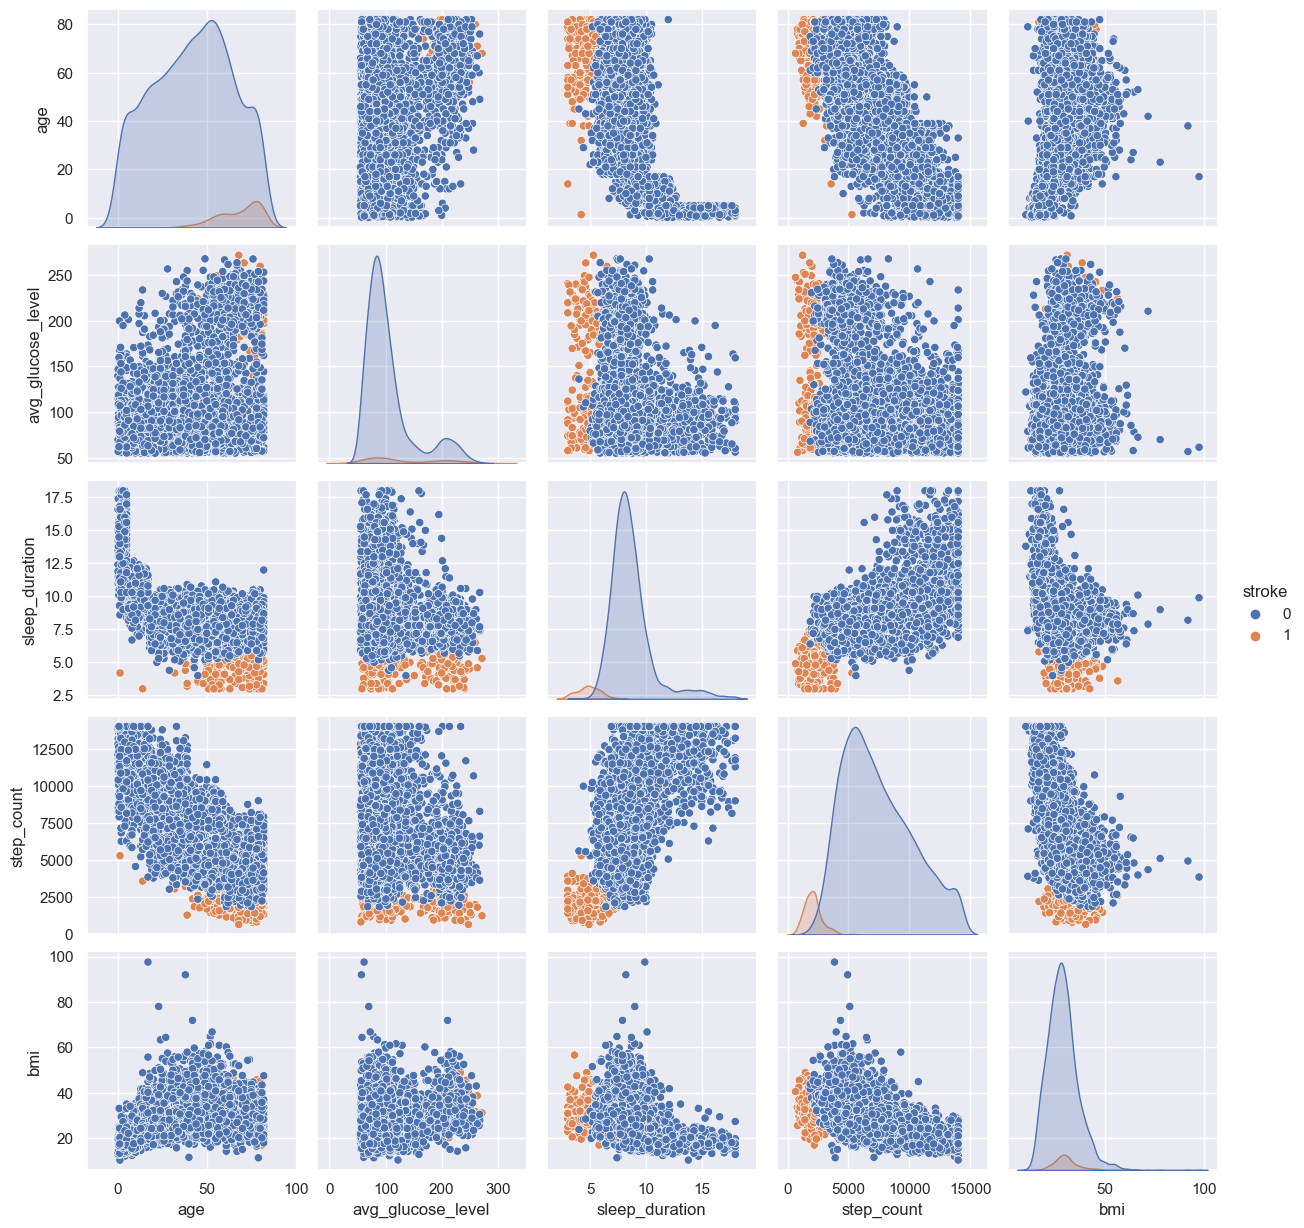

In [38]:
# Plot pairplot
sns.pairplot(plot_var, hue='stroke')

#### Correlation Analysis Using Heatmap

In [39]:
corr_var = merged_data[['age', 'avg_glucose_level', 'bmi', 'resting_heart_rate', 'sleep_duration', 'step_count']]

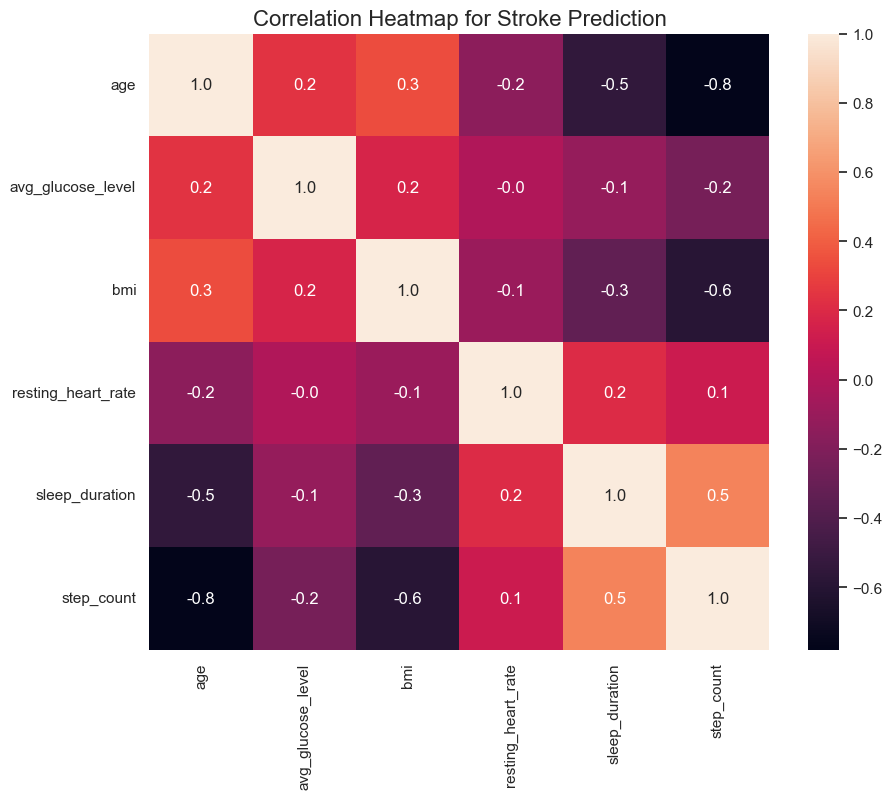

In [40]:
# Correlation Analysis

# Calculate the correlation matrix
corr_matrix = corr_var.corr()

# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(num_var.corr(), annot=True, fmt='.1f')

# Add a title
plt.title('Correlation Heatmap for Stroke Prediction', fontsize=16)

# Show the plot
plt.show()

## Machine Learning

#### Data pre-processing and Feature Engineering

The data pre-processing steps involved addressing missing values by imputing the missing BMI values with age-specific means, encoding categorical variables, performing feature scaling, and splitting the data into training and testing sets. Additionally, feature selection was applied to remove irrelevant features from the dataframe.

In [41]:
# Check for the unique values in the categorical variables and the frequency
for col in ['gender', 'work_type', 'ever_married', 'Residence_type', 'smoking_status']:
    print(f"Value Counts for {col}:\n{merged_data[col].value_counts()}\n")


Value Counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value Counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value Counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value Counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value Counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



#### Label Encoding

Label encoding is a machine learning technique used to convert categorical variables into numerical variables which is required for most machine learning algorithms([Otten, 2023](https://medium.com/@neri.vvo/label-encoding-in-python-practical-guide-and-tutorial-816cfb16f5e7)). The scikitlearn label encoder was used for encoding the bi-class categorical variables "ever married" and "residence type". 

In [42]:
# Encoding the bi-class categorical variables
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encoding ever_married 
merged_data['ever_married_Encoded'] = label_encoder.fit_transform(merged_data['ever_married'])

# Encoding Residence_type (Urban/Rural → 1/0)
merged_data['Residence_type_Encoded'] = label_encoder.fit_transform(merged_data['Residence_type'])

In [43]:
merged_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count,ever_married_Encoded,Residence_type_Encoded
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,77.7,3.4,903,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.2,never smoked,1,83.9,4.8,2403,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,83.6,4.6,1603,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,85.7,3.9,2206,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,96.2,5.8,2211,1,0


#### One Hot Encoding
One hot encoding on the other hand converts each category under the categorical variables into a binary format and creates a separate column for each. This is useful for multi-class categorical variables because it eliminates ordinality, improves model performance and ideal for machine learning algorithm as was described [here](https://www.geeksforgeeks.org/ml-one-hot-encoding/.).

One hot encoding was used to fit and transform the gender, work type and smoking status variables into binary format.

In [44]:
# Encoding the multi-class categorical variables
cat_cols = merged_data[['gender', 'work_type', 'smoking_status']]

# Initialize OHE
ohe = OneHotEncoder(drop='first', sparse_output=False) 

# Fit and transform the data
encoded = ohe.fit_transform(cat_cols)

# Save to a dataframe
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

# Merge with original dataframe
merged_data = pd.concat([merged_data, encoded_df], axis=1)

# Drop original categorical columns
merged_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)


In [45]:
merged_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,resting_heart_rate,sleep_duration,step_count,ever_married_Encoded,Residence_type_Encoded,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,77.7,3.4,903,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,30.2,1,83.9,4.8,2403,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,83.6,4.6,1603,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,85.7,3.9,2206,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,96.2,5.8,2211,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Check for Class Imbalance
 
It is important to check for class imbalance in the target variable, as classification algorithms in machine learning tend to perform poorly when trained on datasets with imbalanced class distributions.([Galli, 2023](https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/.))


In [46]:
# Check for Class Imbalance
print(merged_data['stroke'].value_counts())

# percentage stroke and non-stroke distribution 
stroke_distribution = merged_data['stroke'].value_counts(normalize=True) * 100

print(f"Non-Stroke Cases: {stroke_distribution[0]:.2f}%")
print(f"Stroke Cases: {stroke_distribution[1]:.2f}%")

stroke
0    4861
1     249
Name: count, dtype: int64
Non-Stroke Cases: 95.13%
Stroke Cases: 4.87%


## Dataset Splitting and Oversampling

The Scikit-learn "train test split" function was used to split the dataset into training (75%) and testing (25%) sets. Among the total population of 5,110 in the dataset, stroke cases account for only 4.87%, while non-stroke cases make up 95.13%, indicating a class imbalance. 

Synthetic Minority Oversampling Technique(SMOTE) achieves balance class distribution by randomly increasing the minority class through replication as described [here](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/). SMOTE was applied to the training datasets after data splitting.


In [47]:
# Define independent and target(dependent) variables
X = merged_data.drop(columns=['stroke'])  # Independent variables
y = merged_data['stroke']  # Target variable

# Use the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200,test_size=0.25, stratify=y, shuffle=True)


# Shape of the data
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (3832, 19) (3832,)
Test data shape: (1278, 19) (1278,)


In [48]:
# Apply SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print data shapes after oversampling
print("Training data shape after oversampling:", X_train.shape, y_train.shape)


Training data shape after oversampling: (7290, 19) (7290,)


## Feature Scaling

Feature Scaling is the process of changing the scale of features in a dataset to a common one either by standardization or normalization to make it more suitable for machine learning algorithms ([Landap, 2023](https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/.)). 

The Scikit standard scaler was used for standardizing the distribution of the numerical variables in the dataset.Standard Scaler transforms data into a standardized distribution with a mean of zero and a standard deviation of one as described [here](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/).  This can be achieved with the formula;

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Where:
- X is the original feature value
- μ is the mean of the feature
- σ is the standard deviation of the feature

In [49]:
# Scale numerical variables
scale_cols = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']]

scaler = StandardScaler()

merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']] =scaler.fit_transform(scale_cols)

# Show scaled data
merged_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,resting_heart_rate,sleep_duration,step_count,ever_married_Encoded,Residence_type_Encoded,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,0.993892,1,-0.366977,-2.466701,-2.081157,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.786070,0,0,2.121559,0.165836,1,0.108201,-1.778849,-1.582535,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.626390,0,1,-0.005028,0.463419,1,0.085209,-1.877113,-1.848467,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255342,0,0,1.437358,0.709248,1,0.246156,-2.221040,-1.648021,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.582163,1,0,1.501184,-0.636342,1,1.050894,-1.287526,-1.646359,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Model Evaluation
The training and test models were evaluated using five different classification models and the summary of the evaluation report is in the table below. The decision tree model seems to be the superior model with the highest accuracy, precision, recall, and F1-score while the Random forest classifier is the second best option. The support vector machines has the best recall value of 1 but with lower accuracy, precision and F1 score.


| **Evaluation Model**           | **Accuracy** | **Precision (Stroke Class)** | **Recall (Stroke Class)** | **F1-score** |
|--------------------------------|--------------|------------------------------|---------------------------|--------------|
| Logistic Regression            | 99.2%        | 0.88                         | 0.97                      | 0.92         |
| Decision Tree                  | **99.6%**       | **0.94**                        | 0.98                      | **0.96**         |
| Random Forest                  | 99.5%        | **0.94**                         | 0.97                      | 0.95         |
| Support Vector Machines        | 99.3%        | 0.89                         | **1.00**                      | 0.94         |
| K Nearest Neighbor             | 96.6%        | 0.59                         | 0.95                      | 0.73         |


In [50]:
# Linear Regression
# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Print evaluation metrics
print(f'Linear Regression Classifier Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_lr)}')

Linear Regression Classifier Accuracy: 0.9921752738654147
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1216
           1       0.88      0.97      0.92        62

    accuracy                           0.99      1278
   macro avg       0.94      0.98      0.96      1278
weighted avg       0.99      0.99      0.99      1278



C:\Users\great\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Random Forest Classifier model
# Initialize and train the model
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

# Predictions
y_pred_rfc = rfc_model.predict(X_test)

# Print Evaluation metrics
print(f'Random forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rfc)}')

Random forest Classifier Accuracy: 0.9953051643192489
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.94      0.97      0.95        62

    accuracy                           1.00      1278
   macro avg       0.97      0.98      0.97      1278
weighted avg       1.00      1.00      1.00      1278



In [52]:
# K Nearest Neighbors Classifier
# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Print evaluation metrics
print(f'K Nearest Neighbor Classifier Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_knn)}')

K Nearest Neighbor Classifier Accuracy: 0.9655712050078247
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1216
           1       0.59      0.95      0.73        62

    accuracy                           0.97      1278
   macro avg       0.79      0.96      0.86      1278
weighted avg       0.98      0.97      0.97      1278



In [53]:
# Support Vector Machines (SVM)

# Initialize and train the model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Print evaluation metrics
print(f'Support Vector Machines  Classifier Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_svm)}')

Support Vector Machines  Classifier Accuracy: 0.9937402190923318
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1216
           1       0.89      1.00      0.94        62

    accuracy                           0.99      1278
   macro avg       0.94      1.00      0.97      1278
weighted avg       0.99      0.99      0.99      1278



In [54]:
# Decision Tree Model
# Initialize and train the model
dtc_model = DecisionTreeClassifier(max_depth=5)
dtc_model.fit(X_train, y_train)

# Predictions
y_pred_dtc = dtc_model.predict(X_test)

# Print evaluation metrics
print(f'Decision Tree Model Classifier Accuracy: {accuracy_score(y_test, y_pred_dtc)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_dtc)}')

Decision Tree Model Classifier Accuracy: 0.9953051643192489
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.94      0.97      0.95        62

    accuracy                           1.00      1278
   macro avg       0.97      0.98      0.97      1278
weighted avg       1.00      1.00      1.00      1278



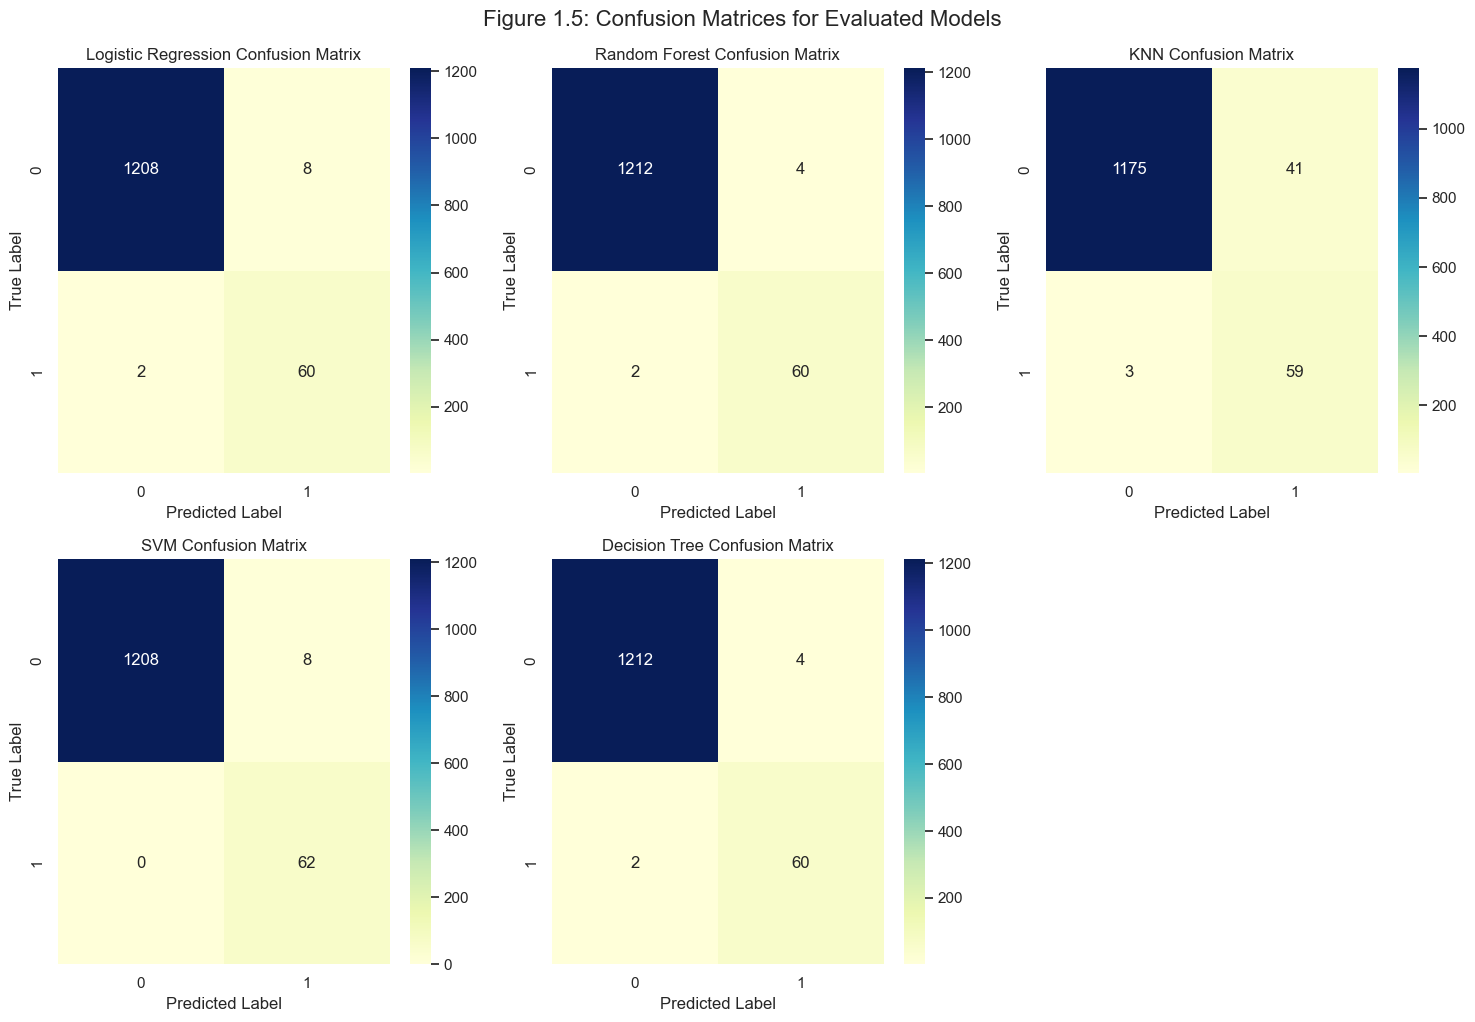

In [55]:
# Define the models and their predictions 
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree']
y_preds = [y_pred_lr, y_pred_rfc, y_pred_knn, y_pred_svm, y_pred_dtc]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each model and its prediction to plot confusion matrix
for i, (model, y_pred) in enumerate(zip(models, y_preds)):
    ax = axs[i // 3, i % 3]  # Correct axis position (row, column)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Remove the empty subplot (bottom-right corner)
fig.delaxes(axs[1, 2])

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle('Figure 1.5: Confusion Matrices for Evaluated Models', fontsize=16, y=1.02)
plt.show()


## Correlation Analysis of Feature Importance

The random forest classifier correlation analysis was performed to determine feature importance. The report below shows that sleep duration, step count, age and formerly smoked status have the strongest influence on a stroke event. This was chosen over the decision tree correlation anlysis because it captured more variables in the feature importance. 

The feature importance analysis findings in this dataset varies from some earlier published reports ([Morelli,2022](https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828), [Parth, 2024](https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/)) on the Kaggle stroke dataset. This may likely be due to the impact of the addition of the wearable device synthesized data to the original kaggle stroke dataset or possible loopoles in the data synthesis process.   

### Random forest classifier correlation analysis

In [56]:
# Random forest classifier feature importance
feature_importances = rfc_model.feature_importances_

features = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

                           Feature  Importance
6                   sleep_duration    0.438945
7                       step_count    0.353555
0                              age    0.082081
16  smoking_status_formerly smoked    0.034348
17     smoking_status_never smoked    0.017731
4                              bmi    0.016218
13               work_type_Private    0.012439
14         work_type_Self-employed    0.011246
3                avg_glucose_level    0.010131
18           smoking_status_smokes    0.006747
10                     gender_Male    0.005317
5               resting_heart_rate    0.003786
15              work_type_children    0.002243
9           Residence_type_Encoded    0.002052
1                     hypertension    0.001585
8             ever_married_Encoded    0.001140
2                    heart_disease    0.000440
11                    gender_Other    0.000000
12          work_type_Never_worked    0.000000


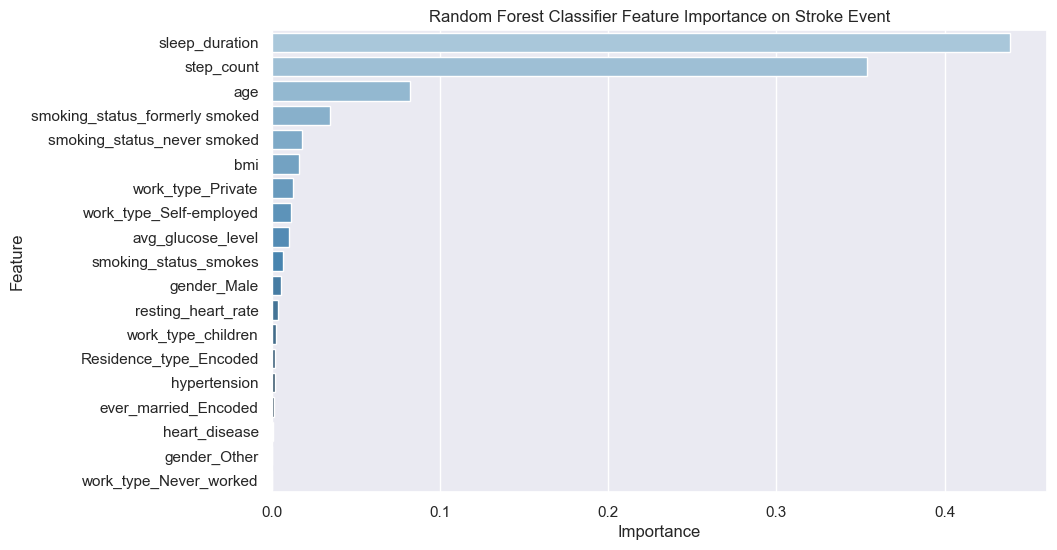

In [57]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Random Forest Classifier Feature Importance on Stroke Event')
plt.show()


### Decision tree classifier feature importance analysis

                           Feature  Importance
6                   sleep_duration    0.895865
7                       step_count    0.098985
4                              bmi    0.002811
5               resting_heart_rate    0.001039
16  smoking_status_formerly smoked    0.001007
1                     hypertension    0.000293
0                              age    0.000000
12          work_type_Never_worked    0.000000
17     smoking_status_never smoked    0.000000
15              work_type_children    0.000000
14         work_type_Self-employed    0.000000
13               work_type_Private    0.000000
9           Residence_type_Encoded    0.000000
11                    gender_Other    0.000000
10                     gender_Male    0.000000
8             ever_married_Encoded    0.000000
3                avg_glucose_level    0.000000
2                    heart_disease    0.000000
18           smoking_status_smokes    0.000000


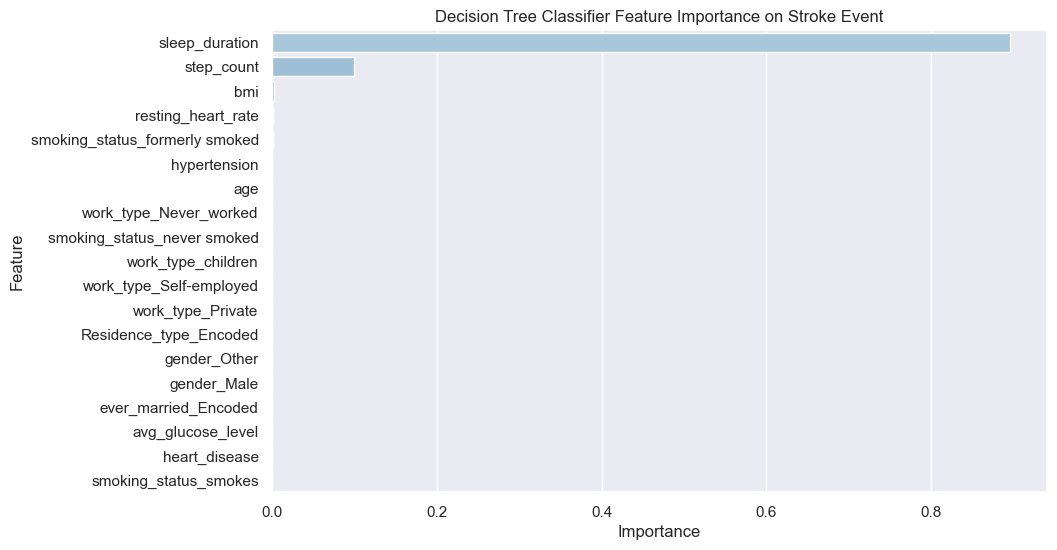

In [58]:
# Decision tree classifier feature importance analysis
feature_importances = dtc_model.feature_importances_

features = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Decision Tree Classifier Feature Importance on Stroke Event')
plt.show()


### Summary

This analysis revealed key insights into stroke prediction based on various features. Countplots indicated a higher incidence of stroke among married individuals, former smokers, self-employed subjects, and those working in the private sector. Univariate and bivariate analyses, including histplots and boxplots, showed a normal distribution of the population, with a notably higher incidence of stroke among individuals over 60 years of age. Stroke patients were found to have average glucose concentrations ranging from normal to high, with a tendency toward elevated glucose levels. Additionally, subjects with stroke exhibited significantly lower sleep duration and step counts compared to the rest of the population.

Correlation analysis using pairplots and heatmaps identified strong negative correlations between age and step count (-0.8), BMI and step count (-0.6), and sleep duration and step count (-0.5), while correlations with other variables were weaker. However, further analysis is needed to account for potential confounding factors to better understand the strength of these relationships.

The decision tree and random forest models, trained on a scaled version of the stroke dataset, achieved impressive accuracies of 99.6% and 99.5%, respectively, when tested using variables such as age, average glucose level, BMI, resting heart rate, sleep duration, and step count. Both models showed a 94% precision, highlighting the potential of data science and machine learning in disease prediction and diagnosis.

A feature importance analysis using the random forest classifier indicated that sleep duration, step count, age, and smoking status (former smokers) were the most influential factors in predicting stroke events. This model was preferred over the decision tree analysis due to its ability to capture a broader range of important features.

### Conclusion

The analysis of the stroke dataset provided valuable insights into stroke prediction, highlighting key features such as age, glucose concentration, BMI, sleep duration, and step count as significant predictors of stroke events.

The decision tree and random forest models, trained on the scaled dataset, achieved impressive accuracies of 99.6% and 99.5%, respectively, which demonstrates the potential of data science and machine learning in predicting disease risk and aiding in diagnosis.

Although these models show great promise, additional testing and refinement with real patient data, including data from wearable devices, are necessary to validate the models' reliability and ensure their practical applicability in clinical environments.

### Disclaimer

Please note that while the synthesized wearable device data has been incorporated into this analysis, drawing from medical research and publications, the results are not intended for clinical or research use. The data generation process may have potential limitations or inaccuracies, which could impact the reliability of the analysis for real-world applications.

## References
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
- Parth (2024) How to create a Stroke Prediction Model? https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/.
- https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828
- https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/table/t1-nss-10-421/
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/
- Holt, P.R., Altayar, O. and Alpers, D.H. (2023) 'Height with Age Affects Body Mass Index (BMI) Assessment of Chronic Disease Risk,' Nutrients, 15(21), p. 4694. https://doi.org/10.3390/nu15214694.
- Van Otten, N. (2024) 'Label encoding in Python: practical guide and tutorial,' Medium, 28 August. https://medium.com/@neri.vvo/label-encoding-in-python-practical-guide-and-tutorial-816cfb16f5e7.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828
- GeeksforGeeks (2024) One hot encoding in machine learning. https://www.geeksforgeeks.org/ml-one-hot-encoding/.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://seaborn.pydata.org/generated/seaborn.pairplot.html
- https://builtin.com/articles/seaborn-pairplot
- https://www.datacamp.com/tutorial/seaborn-palettes
- Chakraborty, P. et al. (2024) 'Predicting stroke occurrences: a stacked machine learning approach with feature selection and data preprocessing,' BMC Bioinformatics, 25(1). https://doi.org/10.1186/s12859-024-05866-8.
- https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
- https://github.com/danielchristopher513/Brain_Stroke_Prediction_Using_Machine_Learning/blob/main/Atom_BrainStrokePrediction.ipynb
- Galli, S. (2023) Exploring oversampling techniques for imbalanced datasets. https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/.
- https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
- https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
- https://realpython.com/train-test-split-python-data/
- Landup, D. (2023) Feature Scaling Data with Scikit-Learn for Machine Learning in Python. https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/.
- https://www.geeksforgeeks.org/comprehensive-guide-to-classification-models-in-scikit-learn/
- Morelli, J. (2022) 'Machine Learning for Stroke Prediction - Jeffrey Morelli - Medium,' Medium, 30 March. https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828.
- Feigin, V.L. et al. (2022) 'World Stroke Organization (WSO): Global Stroke Fact Sheet 2022,' International Journal of Stroke, 17(1), pp. 18–29. https://doi.org/10.1177/17474930211065917.
https://www.cdc.gov/stroke/risk-factors/index.html